In [1]:
import numpy as np
from scipy.optimize import curve_fit

from uncertainties import ufloat, unumpy
import seaborn as sns
import matplotlib.pyplot as plt

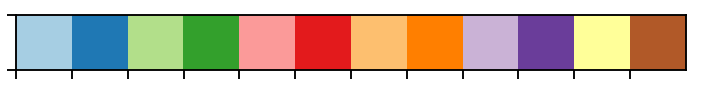

In [2]:
sns.set_context('talk')
sns.palplot(sns.color_palette("Paired"))

# Constants

In [122]:
C = 299792458 # Speed of light [m Hz]

In [129]:
# 88Sr Rydberg constant and ionization energy from 10.1103/PhysRevA.99.022503
I_88 =  ufloat(1377012721, 10)/(100*C/1E6)
RY_88 = ufloat(109736.631, 0) # [/cm]


d_1S0 = [ufloat(3.26896, 0.00002), ufloat(-0.138, 0.007), ufloat(0.9, 0.6)] # From Vaillant2012.JPB.45.135004

d_3S1 = [ufloat(3.370778, 0.000004), ufloat(0.418, 0.001), ufloat(-0.3, 0.1)] # From 10.1103/PhysRevA.99.022503

d_3D1 = [ufloat(2.67517, 0.00020), ufloat(-13.15, 0.26), ufloat(-4.444, 0.091)*1E3] # From 10.1103/PhysRevA.99.022503
d_3D1 = [ufloat(2.66142, 0.00030), ufloat(-16.77, 0.38), ufloat(-6.656, 0.134)*1E3] # From 10.1103/PhysRevA.99.022503


d_3D3 = [ufloat(2.63, 0.01), ufloat(-42.3, 0.3), ufloat(-18, 1)*1E3] # From Vaillant2012.JPB.45.135004

# Hyperfine contact interaction
a_5s = -1000473.673/1E6 # [GHz] from Sunaoshi1993.HI.78.241
a_5s = ufloat(-1000473.673, 0.011)/1E6 # [GHz] from Sunaoshi1993.HI.78.241

# Some general use functions

In [130]:
# Calculate quantum defect
def qd(n, d0, d2, d4):
    return d0 + d2/(n-d0)**2 + d4/(n-d0)**4

def E_Ryd(n, I_S, RY, d):
    [d0, d2, d4] = d
    return I_S - RY/(n-qd(n, d0, d2, d4))**2

# $n$-scaling of splittings

Producing a figure similar to Fig. 1 in the 87Sr spectroscopy paper.

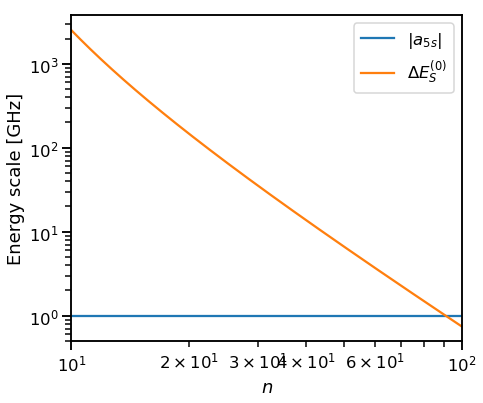

In [133]:
#n = np.arange(10, 200, 1)
#n = np.linspace(10, 100, 100000)
n = np.linspace(10, 100, 1000)

# Energy-scale of the 87Sr+ hyperfine contact interaction in [GHz]
EV_hf = np.abs(a_5s*np.ones(len(n)))

DeltaE_S = np.abs(E_Ryd(n, I_88, RY_88, d_1S0) - E_Ryd(n, I_88, RY_88, d_3S1))*(100*C/1E9)

DeltaE_n = np.abs(E_Ryd(n+1, I_88, RY_88, d_3S1) - E_Ryd(n, I_88, RY_88, d_1S0))*(100*C/1E9)

plt.figure(figsize=(7,6))

# Hyperfine interaction strength
plt.plot(n, unumpy.nominal_values(EV_hf), label=r'$\left|a_{5s}\right|$')
plt.fill_between(n,
                 unumpy.nominal_values(EV_hf)+unumpy.std_devs(EV_hf),
                 unumpy.nominal_values(EV_hf)-unumpy.std_devs(EV_hf))

plt.plot(n, unumpy.nominal_values(DeltaE_S), label=r'${\Delta}E^{\left(0\right)}_{S}$')
plt.fill_between(n,
                 unumpy.nominal_values(DeltaE_S)+unumpy.std_devs(DeltaE_S),
                 unumpy.nominal_values(DeltaE_S)-unumpy.std_devs(DeltaE_S))

plt.xscale('log')
plt.yscale('log')

plt.xlabel(r'$n$')
plt.ylabel(r'Energy scale [GHz]')
plt.legend()

plt.xlim((10, 100))
#plt.ylim((0.9, 1.1))

plt.show()

In [112]:
DeltaE_S

array([2515.596718727903+/-313.6682242379051,
       2409.92089704021+/-301.2646644188022,
       2310.129790011338+/-289.508162464653,
       2215.8173765822526+/-278.35691620251964,
       2126.610874852092+/-267.77233976096414,
       2042.1676089613745+/-257.7187763559483,
       1962.1722086125612+/-248.16324032385387,
       1886.3341021128815+/-239.07518504679982,
       1814.3852688508546+/-230.42629384515806,
       1746.0782214440694+/-222.19029128083358,
       1681.1841915366758+/-214.34277263204328,
       1619.4914964487534+/-206.861049573932,
       1560.804066672842+/-199.72401033598163,
       1504.940116637852+/-192.91199281231843,
       1451.7309432670256+/-186.4066692792848,
       1401.019838680391+/-180.19094152989996,
       1352.6611050010572+/-174.24884537033853,
       1306.5191606080662+/-168.56546354206657,
       1262.46772840287+/-163.12684623712175,
       1220.3890977207423+/-157.91993846519927,
       1180.173452463149+/-152.93251361140017,
       1141

# Semiclassical overlap integral $<n^*|(n+1)^*>$

Following the formula in 10.1103/PhysRevA.24.161 (cited in 10.1103/PhysRevLett.51.771).

In [61]:
def semiclassical_overlap(n1, n1_star, n2, n2_star):
    out = (-1)**(n2-n1) * 2*np.sqrt(n1_star*n2_star)/(n1_star+n2_star) * np.sin(np.pi*(n2_star-n1_star))/(np.pi*(n2_star-n1_star))
    return out

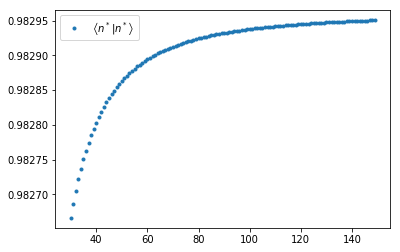

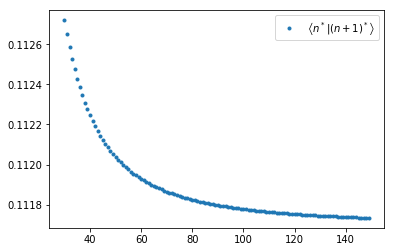

In [62]:
n = np.arange(30, 150, 1)

n1 = n
n1_star = n1-qd(n, 3.26896, -0.138, 0.9)
n2 = n
n2_star = n2-qd(n, 3.371, 0.5, -10)

y1 = semiclassical_overlap(n1, n1_star, n2, n2_star)

n1 = n
n1_star = n1-qd(n, 3.26896, -0.138, 0.9)
n2 = n+1
n2_star = n2-qd(n, 3.371, 0.5, -10)

y2 = semiclassical_overlap(n1, n1_star, n2, n2_star)

plt.figure()
plt.plot(n, np.abs(y1), '.', label=r'$\left\langle{n^*}|{n^*}\right\rangle$')
plt.legend()
plt.show()

plt.figure()
plt.plot(n, np.abs(y2), '.', label=r'$\left\langle{n^*}|{\left(n+1\right)^*}\right\rangle$')
plt.legend()
plt.show()